# ICS 235 Homework Assignment 3
# <span style="color:red">Due: 11:55 PM on Wednesday, October 30</span>

## Instructions

1. Name your notebook file using your last and first name as presented in Laulima.
    - For example, Harry, Potter ==> HarryPotter_3.ipynb (The number at the end is the assignment number.)
2. Only use .ipynb file extensions. Other extensions (file formats) like .rtf, .zip, .docs, .pdf are not accepted.
3. Data files will be available to the instructor, so no need to upload them to Laulima. Make sure you use the same filenames of data files as given in the homework.
4. Save data files in **"data" folder under your working directory**. Use **relative path** when you read in data in your code.
5. Do not create any subfolders in your Drop Box.
6. **Do not modify or delete the provided code unless instructed to do so.**
7. Clean your code before submission.
    - If needed, provide clear documentation describing the purpose and how to use every class or function in your code.
    - Your submission should **show only the required outputs**. 
8. Run your code before submission to **show all outputs in the submitted file**. 
10. Write your full name in the cell below.
***

## Your Name: Anne Dominique Malig
***

# Exercise: Predicting the musical genre

## About the data

In this homework, we will analyze a dataset to **predict the musical genre** of popular songs based on the songs' characteristics. The dataset was cleaned and filtered for our purpose. As usual, you have a data table with samples as rows and features as columns, with one entry per song.
 
The features are:

| Column range | Feature label | Data type | Description                       |
|--------------|---------------|-----------|-----------------------------------|
|      0       | artist        | string    | Name of the singer/band           |
|      1       | track         | string    | Song title                        |
|      2       | duration      | float     | Duration of the song in minutes   |
|      3       | popularity    | integer   | Song popularity between 1 and 100 |
|     4-15     | ...           | float     | Characteristics of the song       |
|      16      |  genre        | string    | Musical genre of the song         |

## Loading the data

We first need to load the dataset.

In [16]:
import numpy as np
import pandas as pd

songs = pd.read_csv("data/songs.csv")
songs.head()

,artist,track,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,Boston,Hitch a Ride,4.20,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.00401,0.101,0.5690,116.454,4,rock
1,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,3.83,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.01610,0.172,0.0918,199.060,4,rock
2,Professional Murder Music,Slow,3.96,29.0,0.431,0.776,10.0,-5.403,1,0.0527,0.000022,0.00130,0.179,0.3180,120.857,4,metal
3,Mohammed Rafi,Meri Dosti Mera Pyar,4.33,11.0,0.491,0.563,7.0,-8.588,0,0.0331,0.957000,0.00230,0.263,0.8430,95.558,4,bollywood
4,"Harald Lassen, Bram de Looze",How it feels pt. 2,4.44,34.0,0.462,0.374,11.0,-12.069,0,0.0331,0.949000,0.92900,0.131,0.1740,122.939,3,instrumental


## Part 1: Preparing the data for analysis (21 points)

1. 1. How many different **artists** are there in the data? How many different **song titles** are there? (2 points)
   2. How many entries do we have for each musical genre? (2 points)

In [17]:
# YOUR CODE

## 1.A

print('There are ' + str(len(songs[['artist']])) + ' artists.')
print('There are ' + str(len(songs[['track']])) + ' song titles.')
## 1.B
genres = ['rock', 'metal', 'bollywood', 'instrumental', 'pop', 'hiphop']
for genre in genres:
    print('There are ' + str(len(songs[(songs['genre'] == genre)])) + ' ' + genre + ' songs.')


There are 7247 artists.
There are 7247 song titles.
There are 3374 rock songs.
There are 1523 metal songs.
There are 270 bollywood songs.
There are 464 instrumental songs.
There are 1099 pop songs.
There are 517 hiphop songs.


2. Now let's choose the features we want for our problem.
    1. Why is it a bad idea to encode the artist and track name (i.e., song title) with an ordinal or one-hot encoder? (Explain for ordinal encoding and one-hot encoding separately.) (5 points)
    2. Drop the artist and track name. Store the target (musical genre) in a new variable `y` and the remaining features in the variable `X`. (5 points)

> **YOUR ANSWER (2.A)**: It is a bad idea to ordinal encode the artist and track name because these categories do not have any sort of ranking, so an ordinal number can't be assigned to every artist and track name. It is also a bad idea to one-hot encode the artist and track name because these categories vary way too much.
> A one-hot encoding would add a new feature for each unique artist or song (4364 + 6691 new features). Since there are very few songs per artists, it would result in a lot of sparse features and can make the learning much slower.
> Another issue is the fact that we can have artists or songs in the test set that are not present in the training set. This is a problem because we cannot encode these examples using the encoder fitted on the training set.

In [18]:
# YOUR CODE (2.B)

X = songs.drop(columns=['artist', 'track', 'genre'])
y = songs['genre']

3. Split the data in training and testing. Using the scikit-learn library, split the data into **80% training and 20% testing**. In order to make the results consistent for everyone, use a **random state of 13**. (2 points)

In [19]:
# YOUR CODE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 13, train_size = 0.8)

4. Normalize the features between 0 and 1. (5 points)

In [20]:
# YOUR CODE

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Part 2: Prediction with an SVM classifier (43 points + 3 bonus points)

1. Fit a linear SVM classifier predicting the genre. Compute the **accuracy** and the **average precision score weighted by the class support** for both the training and test set. (For the precision score weighted by the class support, check out the parameters of the precision calculation function.) (5 points)

In [21]:
# YOUR CODE

from sklearn.svm import SVC
from sklearn.metrics import precision_score

clf = SVC(kernel = 'linear')
clf.fit(X_train_scaled, y_train)

y_pred_train = clf.predict(X_train_scaled)

train_precision = precision_score(y_train, y_pred_train, average = 'weighted')
print(f'Accuracy on training set: {clf.score(X_train_scaled, y_train):.3f}')
print(f'Weighted Average Precision on training set: {train_precision:.3f}')

y_pred_test = clf.predict(X_test_scaled)

test_precision = precision_score(y_test, y_pred_test, average = 'weighted')
print(f'Accuracy on testing set: {clf.score(X_test_scaled, y_test):.3f}')
print(f'Weighted Average Precision on testing set: {test_precision:.3f}')

Accuracy on training set: 0.666
Weighted Average Precision on training set: 0.669
Accuracy on testing set: 0.654
Weighted Average Precision on testing set: 0.653


2. 1. We are now looking for the optimal parameters. Optimize the hyperparameters `C`, `gamma` and the `kernel` using a **randomized search** approach with 3-fold cross-validation. (Use the `RandomizedSearchCV` class.) Use the following ranges for the search:
       - `C: [1, 50) with a step of 5`
       - `gamma: [0.01, 0.5) with a step of 0.1`
       - `kernel: "linear", "poly", or "rbf"` <br/></br>
       
       Run the optimization for **40 iterations** and use a **random state of 13**. Use `SVC` for the SVM classifier. This might take a while. If you have multiple cores on your computer, feel free to run it in parallel using the `n_jobs` parameter of the optimizer. Depending on your computer, this optimization might take a few minutes. (15 points)
       
   2. What are the optimal parameters? Compute the **accuracy** and the **average precision score weighted by the class support** for both the training and test set with the best model found. (5 points)

In [22]:
# YOUR CODE

import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

## 2.A

param_values = {'C': np.arange(1, 50, 5), 'gamma': np.arange(0.01, 0.5, 0.1), 'kernel': ['linear', 'poly', 'rbf']}
clf = SVC()
random_search = RandomizedSearchCV(clf, param_distributions = param_values, n_iter = 40, random_state = 13, return_train_score = True, cv=3)

## 2.B

random_search.fit(X_train_scaled, y_train)
print('Best parameters: ', random_search.best_params_)
best_clf = random_search.best_estimator_

y_pred_train = best_clf.predict(X_train_scaled)
train_precision = precision_score(y_train, y_pred_train, average = 'weighted')

print(f'Accuracy on training set: {best_clf.score(X_train_scaled, y_train):.3f}')
print(f'Weighted Average Precision on training set: {train_precision:.3f}')

y_pred_test = best_clf.predict(X_test_scaled)
test_precision = precision_score(y_test, y_pred_test, average = 'weighted')

print(f'Accuracy on testing set: {best_clf.score(X_test_scaled, y_test):.3f}')
print(f'Weighted Average Precision on testing set: {test_precision:.3f}')


Best parameters:  {'kernel': 'rbf', 'gamma': 0.31000000000000005, 'C': 46}
Accuracy on training set: 0.731
Weighted Average Precision on training set: 0.736
Accuracy on testing set: 0.681
Weighted Average Precision on testing set: 0.681


3. 1. Compute the confusion matrix for the best model on the test set. Normalize each row to make it sum to 1, and then set the diagonal elements to 0. (5 points)
   2. Display the normalized confusion matrix. (3 points) <br/>
   3. **(Bonus)** Annotate the rows and columns with Pandas. (Do NOT hardcode the labels.) Plot the heatmap with the `seaborn.heatmap()` function from the seaborn library to display the label names. (3 points)

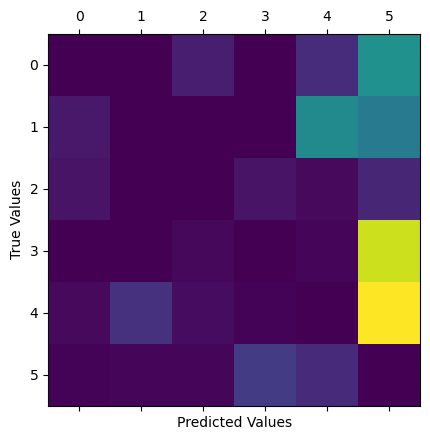

<Axes: >

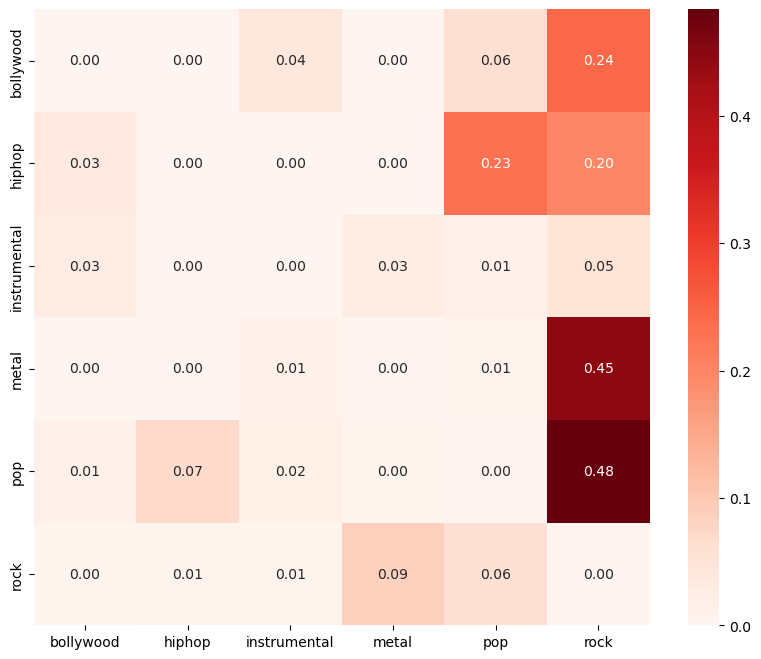

In [23]:
# YOUR CODE

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

## 3.A

y_pred_test = best_clf.predict(X_test_scaled)
conf_mat_test = confusion_matrix(y_test, y_pred_test)
norm_conf_mat_test = conf_mat_test / conf_mat_test.sum(axis = 1, keepdims = True)
np.fill_diagonal(norm_conf_mat_test, 0)

## 3.B

plt.matshow(norm_conf_mat_test, cmap = 'viridis')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

## 3.C (Bonus)

import seaborn as sns

class_labels = np.unique(y_test)

# Create a DataFrame with proper row and column labels
conf_mat_df = pd.DataFrame(norm_conf_mat_test, index= class_labels, columns = class_labels)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_df, annot = True, fmt = ".2f", cmap = 'Reds', cbar = True, square = True)

4. 1. Which classes are easy to distinguish? Which ones are not? Were you expecting those results? (Note: Pay attention to which one, the row or the column, reparesents the true class and which represents predicted class.) (5 points)
   2. A lot of samples are predicted as the rock class. Why is the predictor biased towards the rock class? (5 points)

> **YOUR ANSWER (4.A)**: The classes that are easy to distinguish are pop and metal, while rock and instrumental are hard to distinguish. I was not expecting this because I thought rock and metal would be hard to distinguish since they sound more similar. The easy(hard)-to-distinguish classes are those that have relatively low(high) off-diagonal values in their corresponding "row". For example, the instrumental class has very low off-diagonal values, which means it's rarely mi.
> 

> 
> **YOUR ANSWER (4.B)**: The predictor is biased towards the rock class because most of the songs in the data set are rock songs.
> 

## Part 3: Prediction with decision trees and ensemble methods (36 points)

1. Fit the following classifiers and compute the training and test accuracy. Do not change any parameter values (i.e., use the default values) other than the `random_state`, which is set to 0 for all three models. (7 points)
    1. A decision tree classifier
    2. A random forest classifier
    3. A gradient bosted tree classifier

In [24]:
# YOUR CODE

## 1.A

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state = 0)
tree_clf.fit(X_train_scaled, y_train)

print(f'Train score: {tree_clf.score(X_train_scaled, y_train):.3f}')
print(f'Test score: {tree_clf.score(X_test_scaled, y_test):.3f}')
## 1.B

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train_scaled, y_train)

print(f'Train score: {rf_clf.score(X_train_scaled, y_train):.3f}')
print(f'Test score: {rf_clf.score(X_test_scaled, y_test):.3f}')
## 1.C

from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train_scaled, y_train)

print(f'Train score: {gb_clf.score(X_train_scaled, y_train):.3f}')
print(f'Test score: {gb_clf.score(X_test_scaled, y_test):.3f}')

Train score: 0.975
Test score: 0.548
Train score: 0.975
Test score: 0.663
Train score: 0.790
Test score: 0.696


2. 1. What differences do you observe between the three classifiers? What are the main reasons for those differences? (6 points)
   2. Identify at least three important parameters that can influence their performance, and provide brief explanations for each. (3 points)

> **YOUR ANSWER (2.A)**: Among the three classifiers, the gradient boosting classifier had the greatest accuracy on the test set. On the other hand, the decision tree and random forest classifiers both had the greatest accuracy on the train set. The decision tree and random forest classifiers are overfitting because of bias-variance trade off. This is likely due to the fact that the depth of the trees is not limited for DT and RF (by default max_depth=None): we keep splitting the trees until each subtree is pure. By default, the depth of the gradient boosted (GB) tree model is limited to 3, which can explain why we see the difference in overfitting with the other models.
>

> **YOUR ANSWER (2.B)**: Three important parameters that can influence the performance of decision tree, random forest, and gradient boosting classifiers, are max depth, max fwatures, and number of estimators, respectively. More depth, more features, and more estimators increase the model's complexity. More estimators in RF makes the model more stable.
> 

3. Using your random forest classifier from Question 1, plot the distribution of each feature's importance across all trees in the forest using a boxplot. (15 points)
    - Each feature should be represented in a single boxplot and all boxplots should put in one plot.
    - Each x-tick represents a different feature. Label the x-ticks with the feature names (the columns of X_train). Make sure that the labels (feature names) do not overlap in the plot.
    - Overlay a dashed line connecting the ensemble model's feature importances.

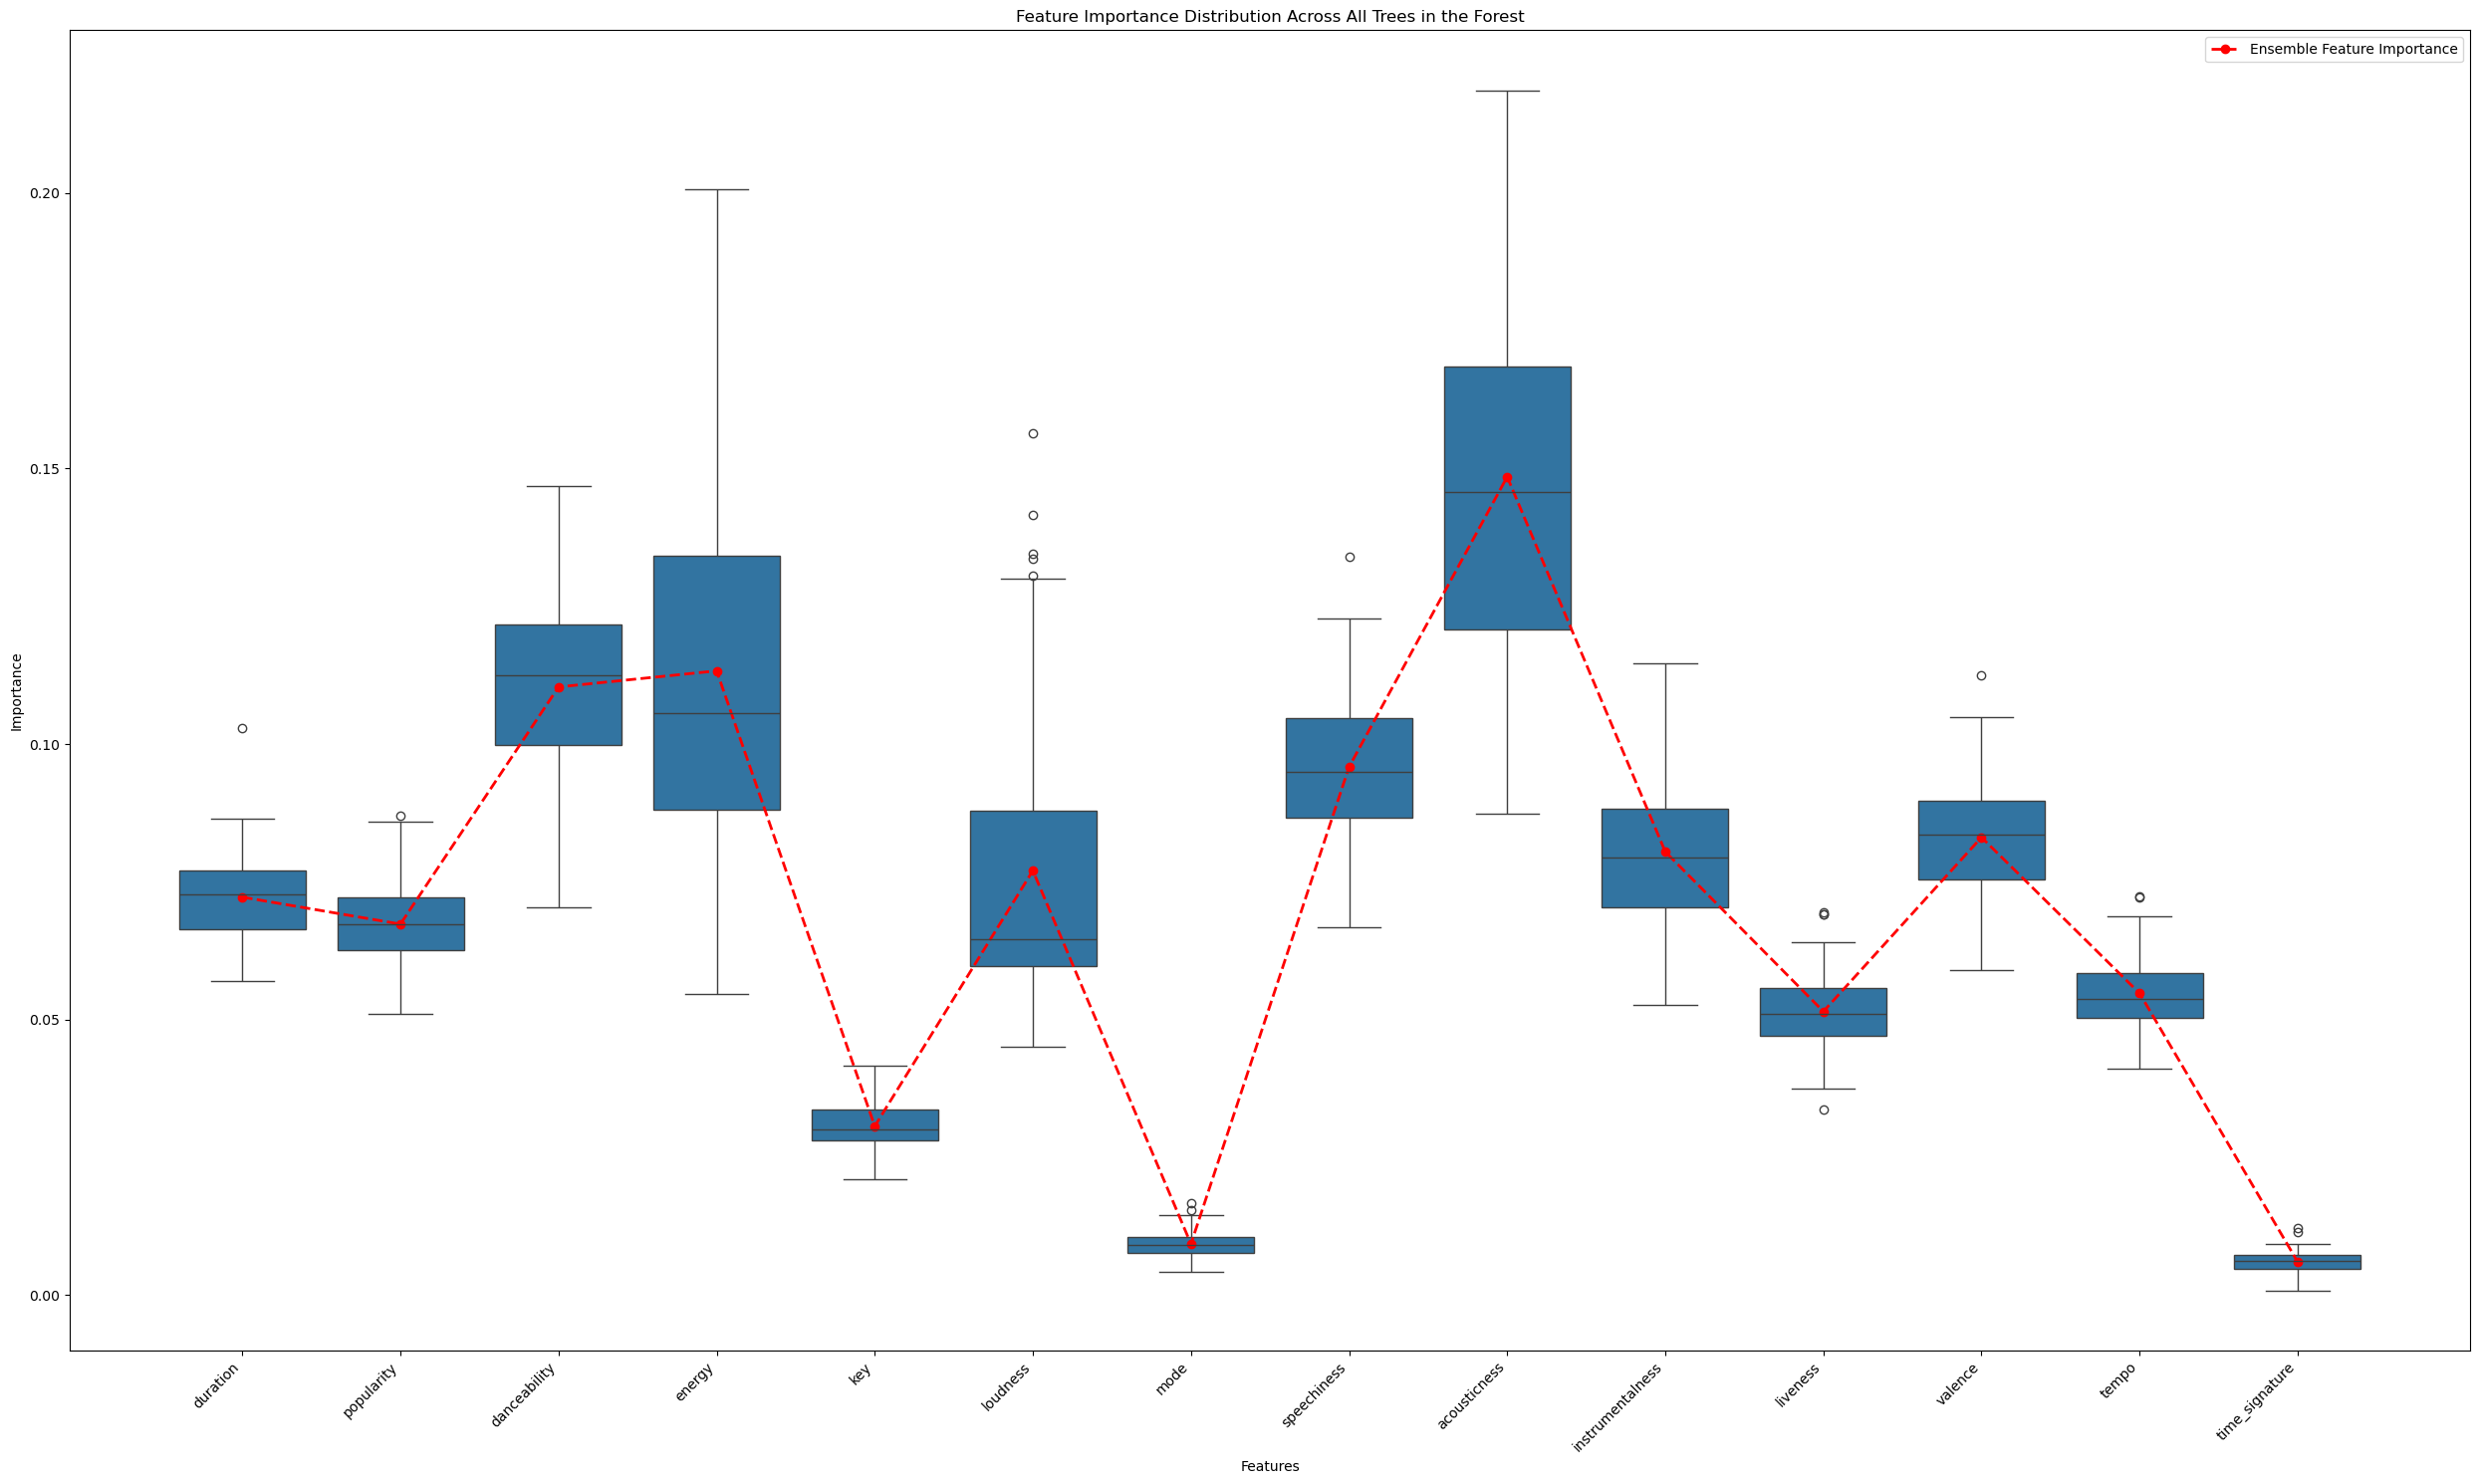

In [26]:
# YOUR CODE
import seaborn as sns

tree_importances = []
for tree in rf_clf.estimators_:
    tree_importances.append(tree.feature_importances_)

tree_importances = np.array(tree_importances)

feature_names = X_train.columns
data_for_plot = []

for i, feature in enumerate(feature_names):
    for importance in tree_importances[:, i]:
        data_for_plot.append({'Feature': feature, 'Importance': importance})

df = pd.DataFrame(data_for_plot)

ensemble_importance = rf_clf.feature_importances_

plt.figure(figsize=(25, 15))
sns.boxplot(x='Feature', y='Importance', data=df)
plt.plot(range(len(feature_names)), ensemble_importance, linestyle='--', marker='o', 
         color='red', linewidth=2, markersize=6, label='Ensemble Feature Importance')
plt.title('Feature Importance Distribution Across All Trees in the Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


4. Comment on the feature importance values shown in the plot. Do they make sense? (5 points)

> **YOUR ANSWER**: I think that the feature importance values make sense because when determining the genre of a song, it would be logical to think that the about its key and acousticness.
>